In [42]:
#di luar environment kaggle
import os
#!/bin/bash
!curl -L -o ./archive.zip https://www.kaggle.com/api/v1/datasets/download/deltasierra452/airline-pax-satisfaction-survey
!unzip archive
data = pd.read_csv("airline_clnd.csv") 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2208k  100 2208k    0     0  2162k      0  0:00:01  0:00:01 --:--:-- 2162k
Archive:  archive.zip
  inflating: airline_clnd.csv        


In [1]:
#menggunakan environment kaggle
import pandas as pd
data=pd.read_csv("/kaggle/input/airline-pax-satisfaction-survey/airline_clnd.csv")
data


,SR,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [2]:
data=data.drop("SR",axis=1)
data=data.drop("id",axis=1)


In [3]:
age_groups={
    "0-9":data.Age.loc[data.Age<10].shape[0],
    "10-19":data.Age.loc[(data.Age>10)&(data.Age<=20)].shape[0],
    "20-29":data.Age.loc[(data.Age>20)&(data.Age<=30)].shape[0],
    "30-39":data.Age.loc[(data.Age>30)&(data.Age<=40)].shape[0],
    "40-49":data.Age.loc[(data.Age>40)&(data.Age<=50)].shape[0],
    "50-59":data.Age.loc[(data.Age>50)&(data.Age<=60)].shape[0],
    "60-69":data.Age.loc[(data.Age>60)&(data.Age<=70)].shape[0],
    "70-79":data.Age.loc[(data.Age>70)&(data.Age<=80)].shape[0],
    "80-89":data.Age.loc[(data.Age>80)&(data.Age<=90)].shape[0],
}
print(age_groups)


{'0-9': 1894, '10-19': 8756, '20-29': 21424, '30-39': 21203, '40-49': 23199, '50-59': 18769, '60-69': 7220, '70-79': 739, '80-89': 17}


In [4]:
import numpy as np
x = np.array(list(age_groups.values()))
print("Age groups:")
for i in age_groups.keys():
    print(i,"\tPercentage:",age_groups[i]/x.sum()*100,"%")

Age groups:
0-9 	Percentage: 1.8348979374352117 %
10-19 	Percentage: 8.482769978977146 %
20-29 	Percentage: 20.75546642640548 %
30-39 	Percentage: 20.541362707201056 %
40-49 	Percentage: 22.47507774580754 %
50-59 	Percentage: 18.183315410623806 %
60-69 	Percentage: 6.994700690750913 %
70-79 	Percentage: 0.7159395859369702 %
80-89 	Percentage: 0.01646951686187888 %


In [5]:
#mengidentifikasi penumpang tidak loyal berumumur 20-60
# data=data.loc[data["Customer_Type"]=="disloyal Customer"]
data=data.loc[(data.Age>=20)&(data.Age<=60)]
# data=data.drop("Customer_Type",axis=1)
data=data.dropna()

                         jumlah sampel  persentase
satisfaction                                      
neutral or dissatisfied          44372        51.7
satisfied                        41493        48.3


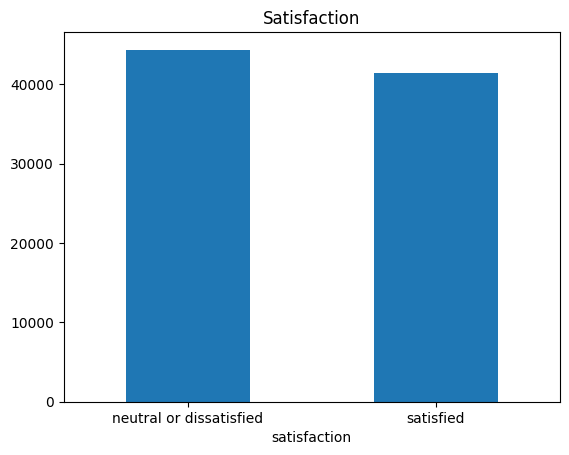

In [6]:
count = data["satisfaction"].value_counts()
percent = 100*data["satisfaction"].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title="Satisfaction",rot=0);

In [7]:
data.describe().round(2)

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,85865.00,85865.00,85865.00,85865.00,85865.00,85865.00,85865.00,85865.00,85865.00,85865.00,85865.00,85865.00,85865.00,85865.00,85865.00,85865.00,85865.00,85865.00
mean,39.84,1239.69,2.76,3.00,2.78,2.98,3.23,3.33,3.50,3.41,3.42,3.40,3.66,3.33,3.66,3.33,14.74,15.16
std,11.42,1025.40,1.35,1.53,1.41,1.29,1.32,1.34,1.31,1.32,1.28,1.31,1.18,1.26,1.17,1.30,38.24,38.75
min,20.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,30.00,425.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,3.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,40.00,867.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,49.00,1846.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,5.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,60.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


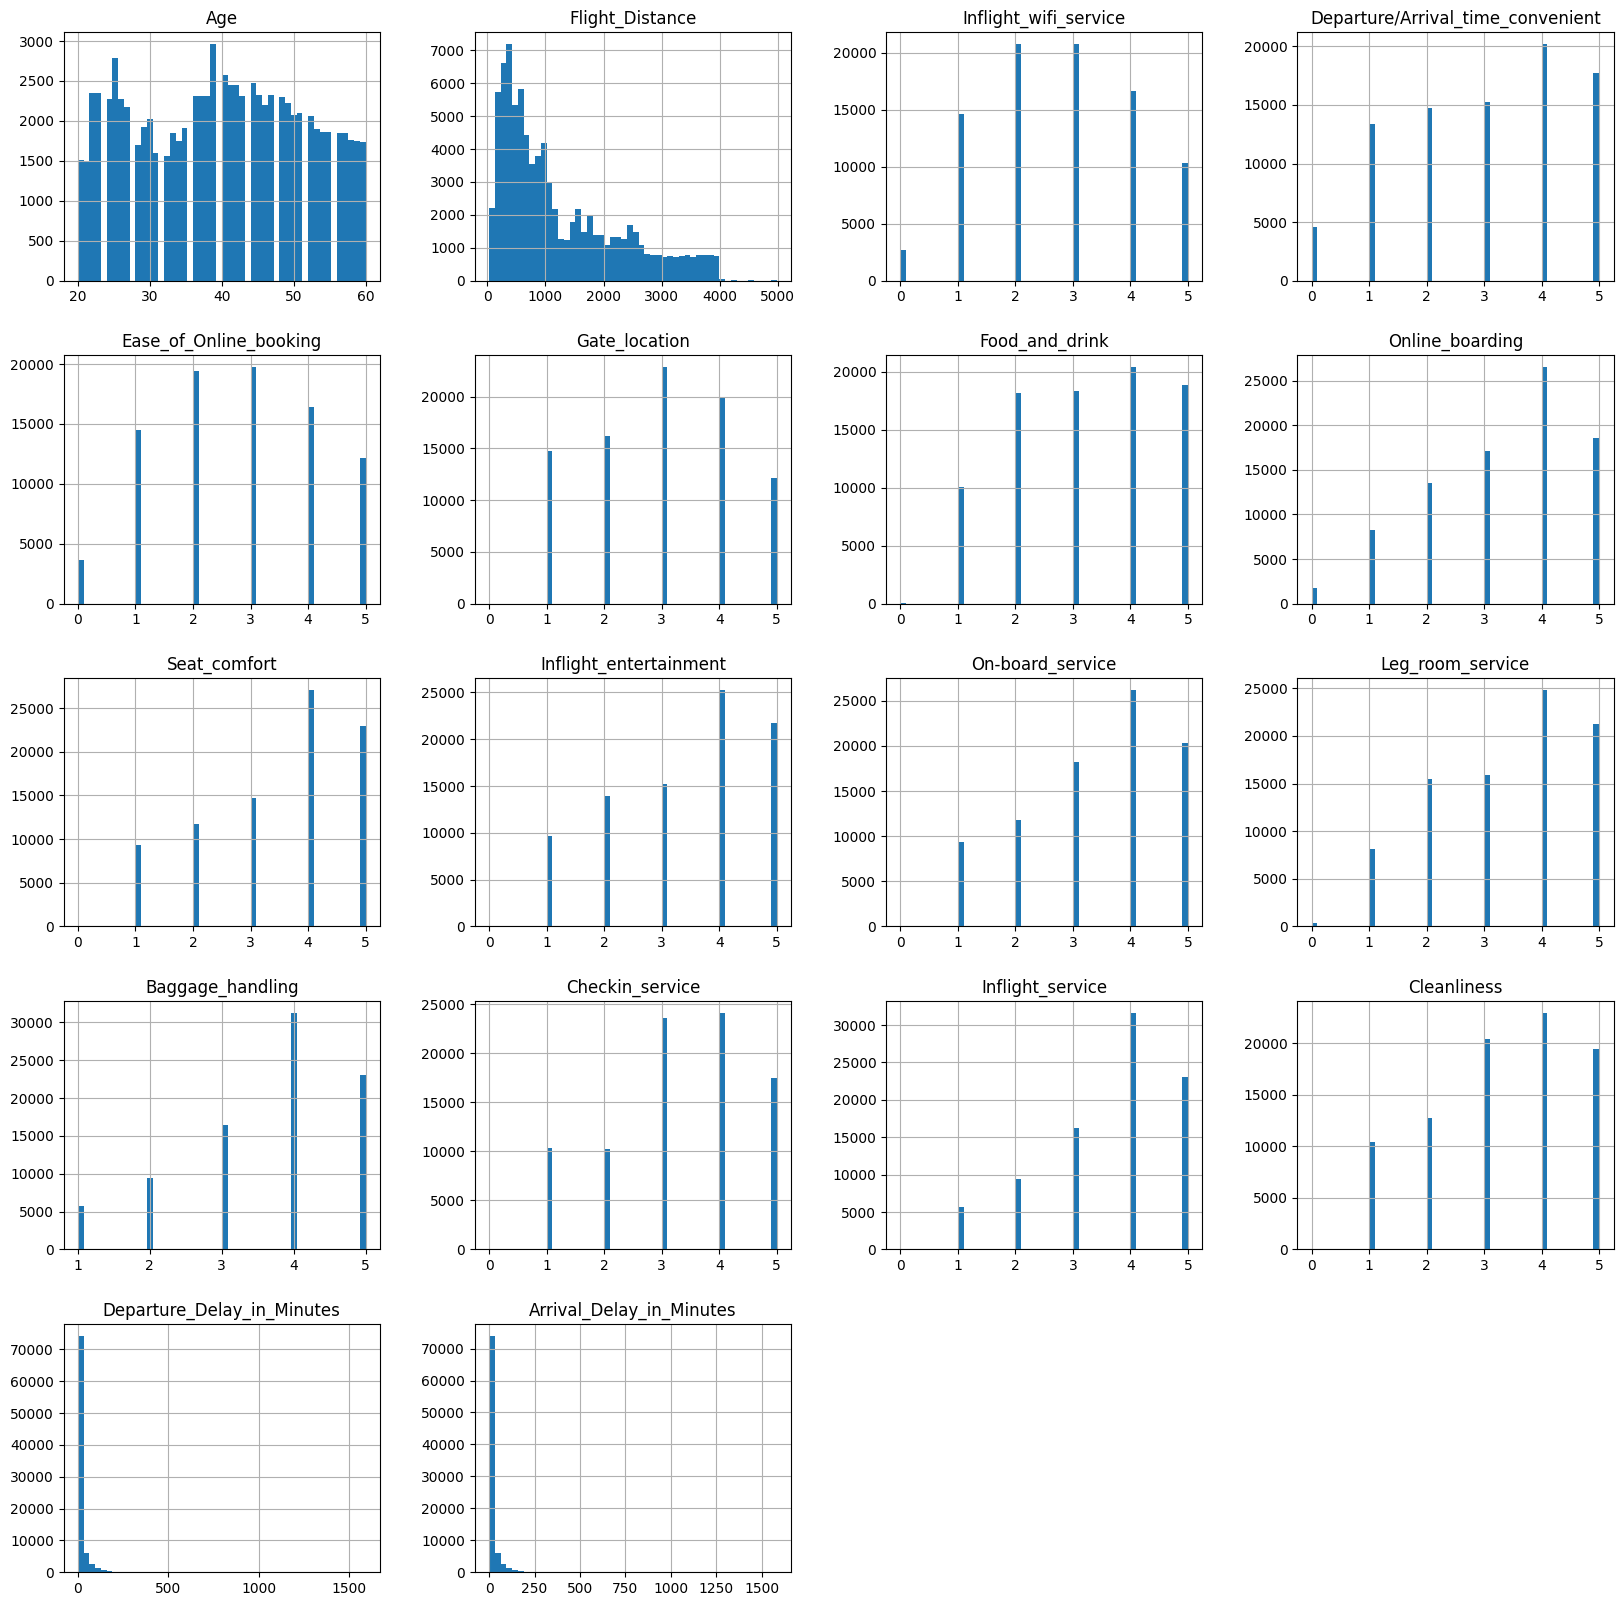

In [8]:
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,20))
plt.show()


In [9]:
numerical_features=["Age","Flight_Distance","Departure_Delay_in_Minutes","Arrival_Delay_in_Minutes"]
features=list(data.columns)
for i in numerical_features:
    features.remove(i)
data[features]


,Gender,Customer_Type,Type_of_Travel,Class,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction
1,Male,disloyal Customer,Business travel,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied
3,Female,Loyal Customer,Business travel,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
5,Female,Loyal Customer,Personal Travel,Eco,3,4,2,1,1,2,1,1,3,4,4,4,4,1,neutral or dissatisfied
6,Male,Loyal Customer,Personal Travel,Eco,2,4,2,3,2,2,2,2,3,3,4,3,5,2,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,2,1,2,3,2,2,2,2,3,1,4,2,3,2,neutral or dissatisfied
103900,Male,Loyal Customer,Business travel,Business,4,4,4,4,2,4,5,5,5,5,5,5,5,4,satisfied
103901,Male,disloyal Customer,Business travel,Business,1,1,1,3,4,1,5,4,3,2,4,5,5,4,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,1,1,1,5,1,1,1,1,4,5,1,5,4,1,neutral or dissatisfied


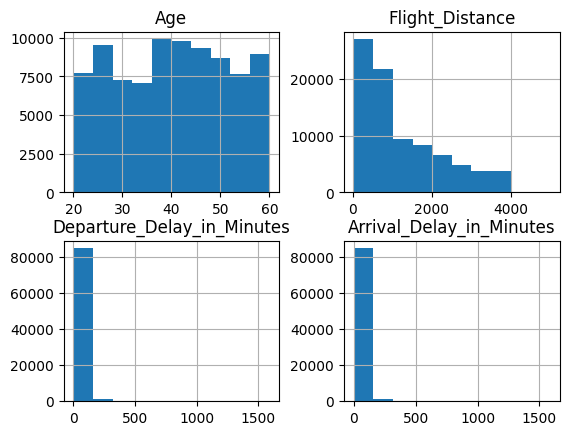

In [10]:
data[numerical_features].hist()
plt.show()

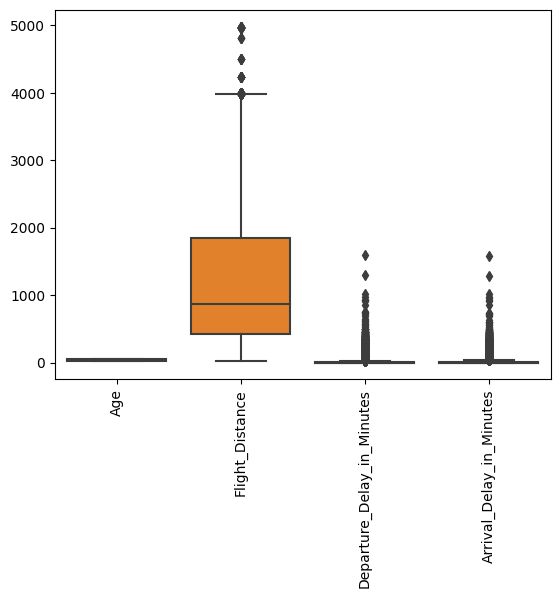

In [11]:
import seaborn as sns
sns.boxplot(data[numerical_features])
plt.xticks(rotation=90)
plt.show()

In [12]:
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR=Q3-Q1
data=data[~((data[numerical_features]<(Q1-1.5*IQR))|(data[numerical_features]>(Q3+1.5*IQR))).any(axis=1)]
data

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


                         jumlah sampel  persentase
satisfaction                                      
neutral or dissatisfied          36294        50.4
satisfied                        35707        49.6


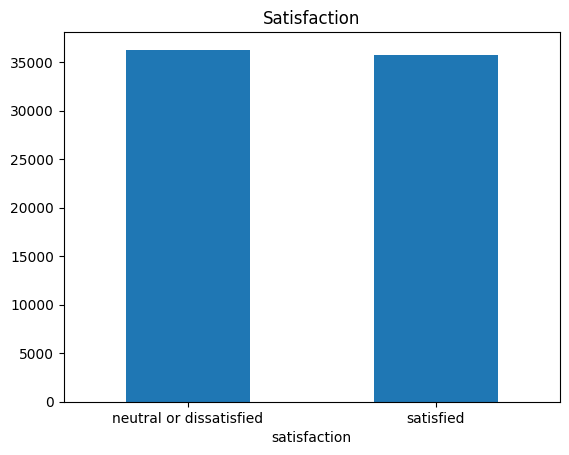

In [13]:
count = data["satisfaction"].value_counts()
percent = 100*data["satisfaction"].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title="Satisfaction",rot=0);

In [14]:
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import LabelEncoder
data = pd.concat([data, pd.get_dummies(data['Gender'], prefix='Gender')],axis=1)
data = pd.concat([data, pd.get_dummies(data['Type_of_Travel'], prefix='Travel')],axis=1)
data = pd.concat([data, pd.get_dummies(data['Class'], prefix='Class')],axis=1)
data = pd.concat([data, pd.get_dummies(data['Customer_Type'], prefix='Customer_Type')],axis=1)

le = LabelEncoder()
data["satisfaction"]=le.fit_transform(data["satisfaction"])
data.drop(['Gender',"Type_of_Travel","Class","Customer_Type"],axis=1,inplace=True)


In [15]:
data

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,...,satisfaction,Gender_Female,Gender_Male,Travel_Business travel,Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer
1,25,235,3,2,3,3,1,3,1,1,...,0,False,True,True,False,True,False,False,False,True
2,26,1142,2,2,2,2,5,5,5,5,...,1,True,False,True,False,True,False,False,True,False
3,25,562,2,5,5,5,2,2,2,2,...,0,True,False,True,False,True,False,False,True,False
5,26,1180,3,4,2,1,1,2,1,1,...,0,True,False,False,True,False,True,False,True,False
6,47,1276,2,4,2,3,2,2,2,2,...,0,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,...,0,True,False,True,False,False,True,False,False,True
103900,49,2347,4,4,4,4,2,4,5,5,...,1,False,True,True,False,True,False,False,True,False
103901,30,1995,1,1,1,3,4,1,5,4,...,0,False,True,True,False,True,False,False,False,True
103902,22,1000,1,1,1,5,1,1,1,1,...,0,True,False,True,False,False,True,False,False,True


In [16]:
from sklearn.model_selection import train_test_split
 
X = data.drop("satisfaction",axis=1)
y = data['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)


In [17]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 72001
Total # of sample in train dataset: 57600
Total # of sample in test dataset: 14401


In [18]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
numerical_features=["Age","Flight_Distance","Departure_Delay_in_Minutes","Arrival_Delay_in_Minutes"]
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].describe().round(2)

,Age,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,57600.00,57600.00,57600.00,57600.00
mean,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.74,-1.18,-0.51,-0.52
25%,-0.86,-0.80,-0.51,-0.52
50%,0.01,-0.36,-0.51,-0.52
75%,0.80,0.60,0.08,0.07
max,1.76,2.70,3.93,4.22


In [19]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_acc', 'test_acc'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
 
models.loc['train_acc','KNN'] = knn.score(X_train,y_train)
print(models)

                KNN RandomForest Boosting
train_acc  0.934427          NaN      NaN
test_acc        NaN          NaN      NaN


In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=None,)
rf.fit(X_train,y_train)
models.loc['train_acc','RandomForest'] = rf.score(X_train,y_train)
print(models)


                KNN RandomForest Boosting
train_acc  0.934427          1.0      NaN
test_acc        NaN          NaN      NaN


In [22]:
from sklearn.ensemble import AdaBoostClassifier
 
boosting = AdaBoostClassifier(learning_rate=0.1, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_acc','Boosting'] = boosting.score(X_train,y_train)
print(models)

                KNN RandomForest  Boosting
train_acc  0.934427          1.0  0.902743
test_acc        NaN          NaN       NaN


In [23]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

/tmp/ipykernel_30/1391920633.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.29999868 -1.03806414  0.00967399 ... -0.60150659 -1.56193321
  0.88278911]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])
/tmp/ipykernel_30/1391920633.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.04325622 -0.70706998  1.01416425 ...  1.19896838 -0.27553267
 -0.04354451]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])
/tmp/ipykernel_30/1391920633.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.51332835 -0.51332835  1.11619566 ... 

In [24]:
#model evaluation
acc = pd.DataFrame()
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
model_dict = {'KNN': knn, "Ada Boosting":boosting,'RF': rf}
for name, model in model_dict.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # acc.loc[name, 'Accuracy_train'] = accuracy_score(y_true=y_train,y_pred=y_pred_train) 
    # acc.loc[name, "Precision_train"] = precision_score(y_true=y_train,y_pred=y_pred_train)
    # acc.loc[name, "Recall_train"] = recall_score(y_true=y_train,y_pred=y_pred_train)
    # acc.loc[name, "F1_score_train"] = f1_score(y_true=y_train,y_pred=y_pred_train)
    acc.loc[name, 'Accuracy_test'] = accuracy_score(y_true=y_test,y_pred=y_pred_test)
    acc.loc[name, "Precision_test"] = precision_score(y_true=y_test,y_pred=y_pred_test)
    acc.loc[name, "Recall_test"] = recall_score(y_true=y_test,y_pred=y_pred_test)
    acc.loc[name, "F1_score_test"] = f1_score(y_true=y_test,y_pred=y_pred_test)
    
acc


,Accuracy_test,Precision_test,Recall_test,F1_score_test
KNN,0.926047,0.946758,0.900042,0.922809
Ada Boosting,0.902854,0.898120,0.904849,0.901472
RF,0.961669,0.970694,0.950657,0.960571


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [50,100,200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [None],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5,verbose=5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50;, score=0.959 total time=   2.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50;, score=0.961 total time=   2.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50;, score=0.959 total time=   2.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50;, score=0.960 total time=   2.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50;, score=0.961 total time=   2.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.960 total time=   4.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.960 total time=   3.9s
[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.960 total time=   4.0s
[CV 4/5] END criterion=gini, max

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [26]:
print(CV_rfc.best_params_)
best_params=CV_rfc.best_params_
knn = RandomForestClassifier(criterion=best_params['criterion'],max_depth=best_params['max_depth'],
                            max_features=best_params['max_features'],n_estimators=best_params['n_estimators'])
knn.fit(X_train,y_train)
model_dict_ = {'KNN_grid_search': knn}
acc1 = pd.DataFrame()


for name, model in model_dict_.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # acc.loc[name, 'Accuracy_train'] = accuracy_score(y_true=y_train,y_pred=y_pred_train) 
    # acc.loc[name, "Precision_train"] = precision_score(y_true=y_train,y_pred=y_pred_train)
    # acc.loc[name, "Recall_train"] = recall_score(y_true=y_train,y_pred=y_pred_train)
    # acc.loc[name, "F1_score_train"] = f1_score(y_true=y_train,y_pred=y_pred_train)
    acc.loc[name, 'Accuracy_test'] = accuracy_score(y_true=y_test,y_pred=y_pred_test)
    acc.loc[name, "Precision_test"] = precision_score(y_true=y_test,y_pred=y_pred_test)
    acc.loc[name, "Recall_test"] = recall_score(y_true=y_test,y_pred=y_pred_test)
    acc.loc[name, "F1_score_test"] = f1_score(y_true=y_test,y_pred=y_pred_test)
acc

{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 500}


,Accuracy_test,Precision_test,Recall_test,F1_score_test
KNN,0.926047,0.946758,0.900042,0.922809
Ada Boosting,0.902854,0.898120,0.904849,0.901472
RF,0.961669,0.970694,0.950657,0.960571
KNN_grid_search,0.963128,0.973783,0.950516,0.962009


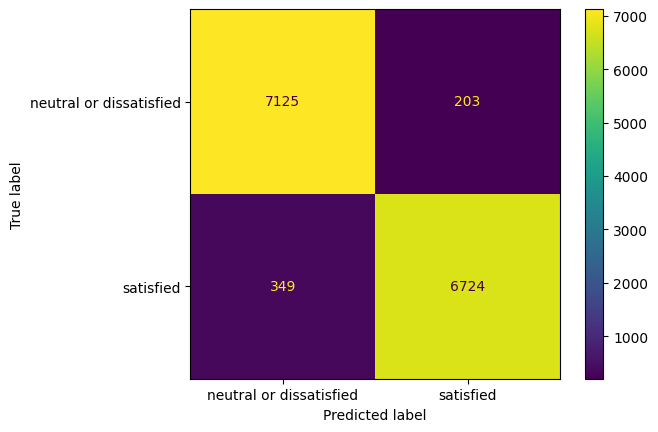

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf,X_test,y_test,display_labels=['neutral or dissatisfied','satisfied'])
plt.show()

In [44]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
